Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax:
Price: Offer Price in EUROs


Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
cars_data=pd.read_csv('ToyotaCorolla - MLR.csv')



In [4]:
cars_data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
#from the above dataset they asked us to predict the price of the car. and we have different attributes from that we are building model and checking the accuracy of the models and predict the price of the cars.
 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR


In [5]:
#checking the rows and columns of the data
cars_data.shape

(1436, 11)

In [6]:
#chechking null values in the dataset
cars_data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [7]:
#checking duplicate rows in the dataset
cars_data.duplicated().sum()

np.int64(1)

In [8]:
#droping the duplicated row from the dataset
cars_data.drop_duplicates(inplace=True)

In [9]:
cars_data.duplicated().sum()

np.int64(0)

In [10]:
# i am removing the cylinders column because it has a constant value 4
cars_data.drop('Cylinders',inplace=True,axis=1)

In [12]:
cars_data.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Gears,int64
Weight,int64


In [13]:
#distributing the categorical data and continous data
cat_data=cars_data.select_dtypes(include='object')
cat_data.head()

,Fuel_Type
0,Diesel
1,Diesel
2,Diesel
3,Diesel
4,Diesel


In [14]:
#continous data
con_data=cars_data.select_dtypes(include='number')
con_data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,90,0,2000,3,5,1165
1,13750,23,72937,90,0,2000,3,5,1165
2,13950,24,41711,90,0,2000,3,5,1165
3,14950,26,48000,90,0,2000,3,5,1165
4,13750,30,38500,90,0,2000,3,5,1170


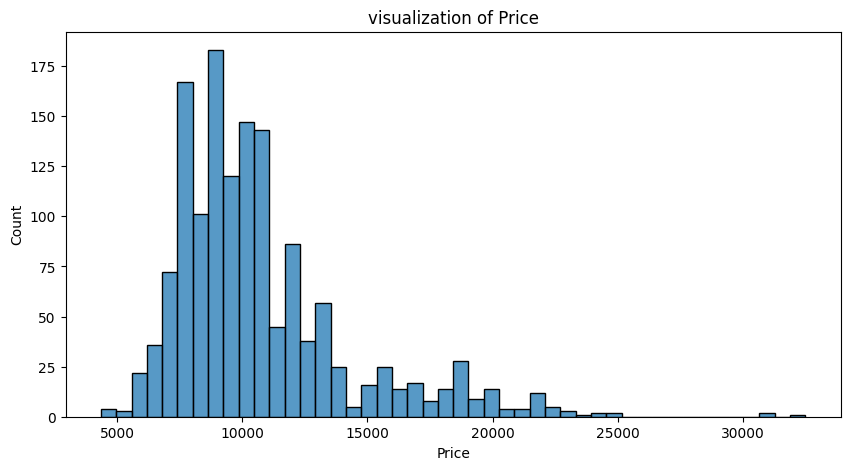

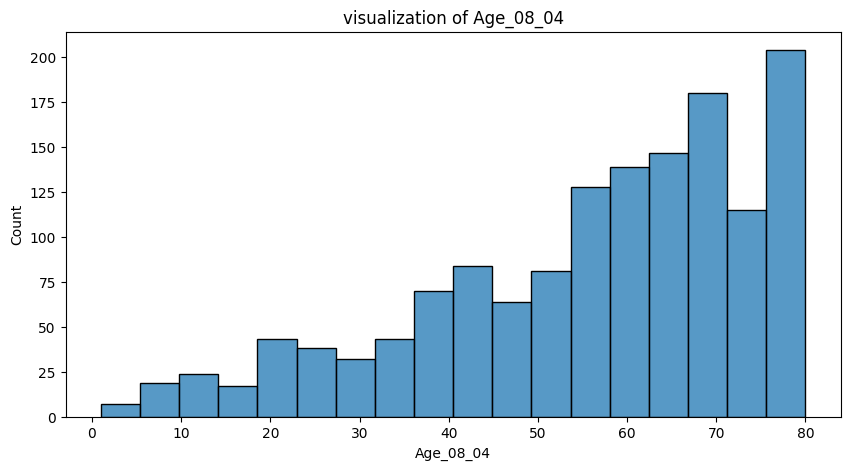

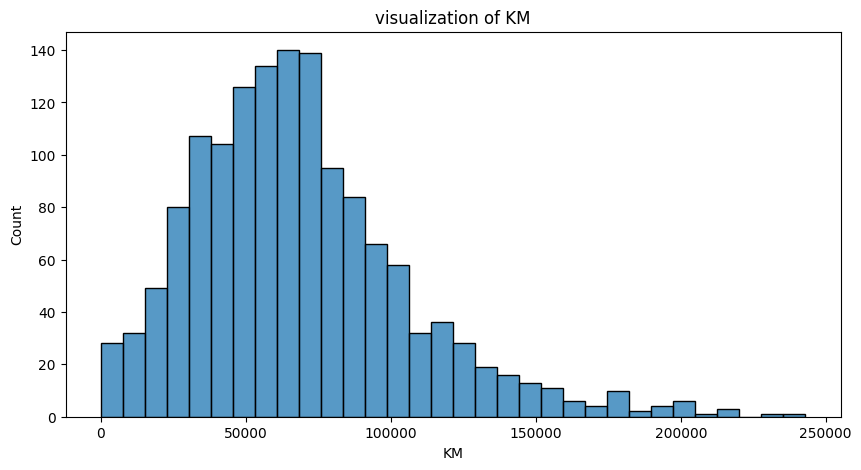

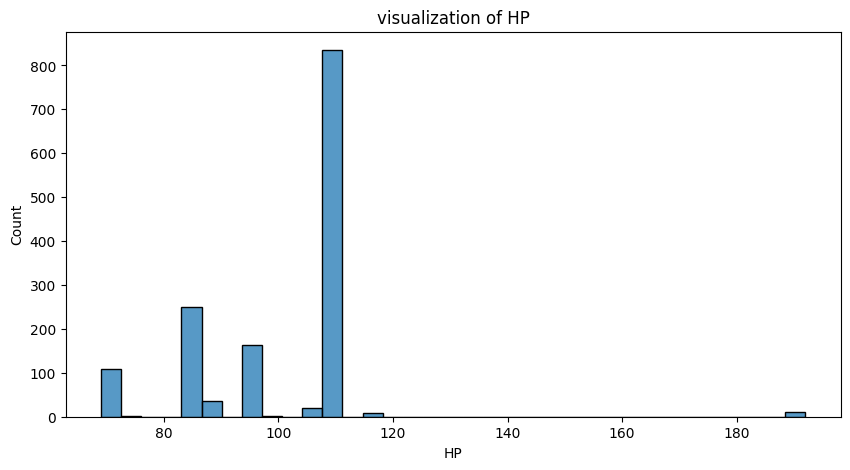

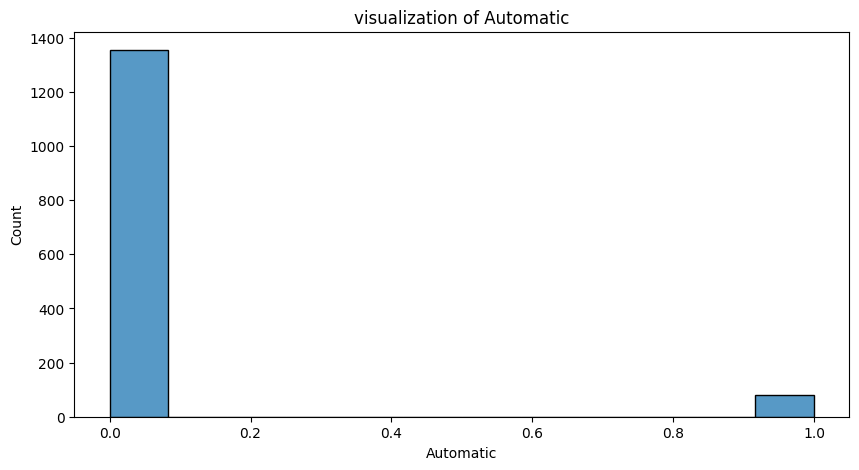

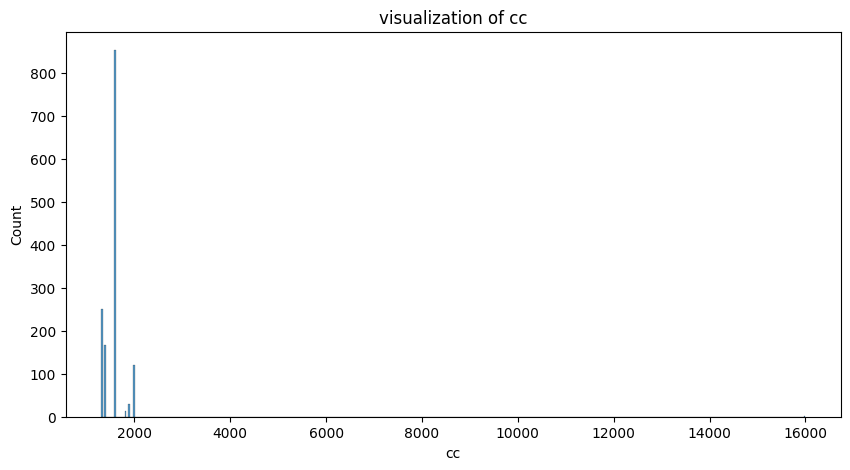

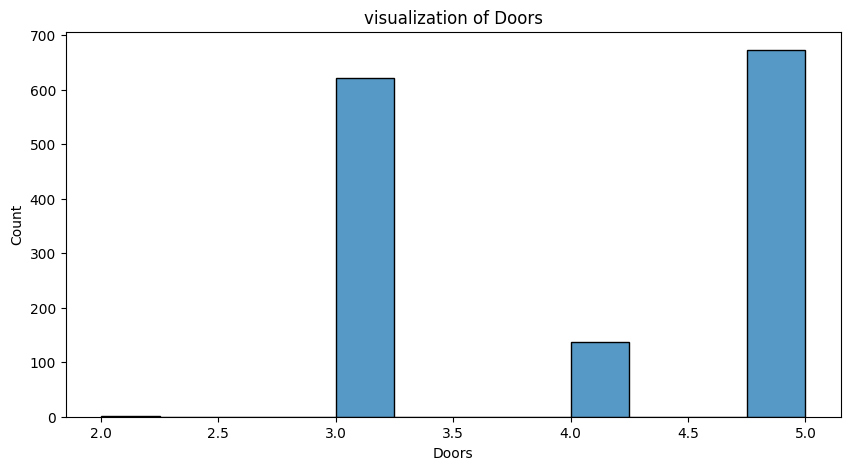

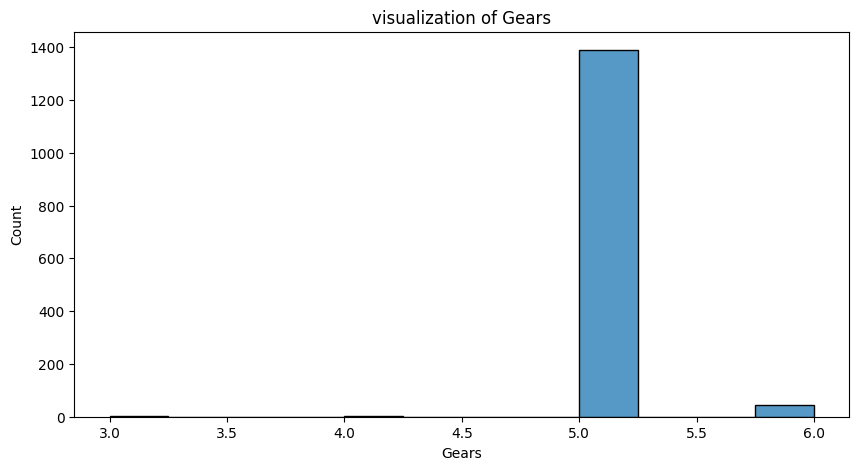

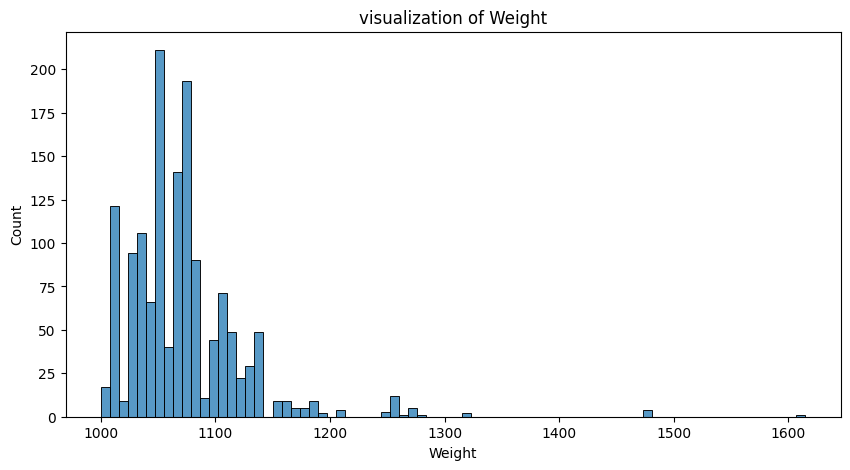

In [16]:
#visulaization of continous data
for col in con_data:
  plt.figure(figsize=(10,5))
  sns.histplot(con_data[col])
  plt.title(f"visualization of {col}")
  plt.show()

from the above visualization of continous attributes like km,age,weight,price has the continous data

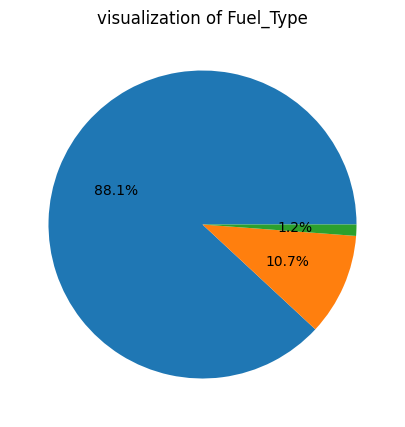

In [24]:
#visulaization of categorical data
for col in cat_data:
  plt.figure(figsize=(10,5))
  plt.pie(cat_data[col].value_counts(),autopct='%1.1f%%')
  plt.title(f"visualization of {col}")
  plt.show()

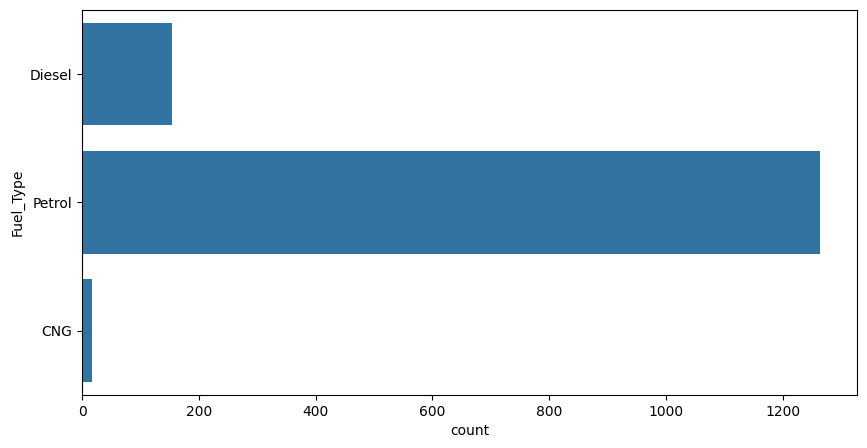

In [25]:
#countplot of the categorical data
for col in cat_data:
  plt.figure(figsize=(10,5))
  sns.countplot(cat_data[col])
  plt.show()

from both visualization we can say that most of the vehicles in the dataset are using petrol as there fueltype

In [26]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age_08_04  1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   object
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Gears      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 123.3+ KB


In [27]:
#stastical summary
cars_data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


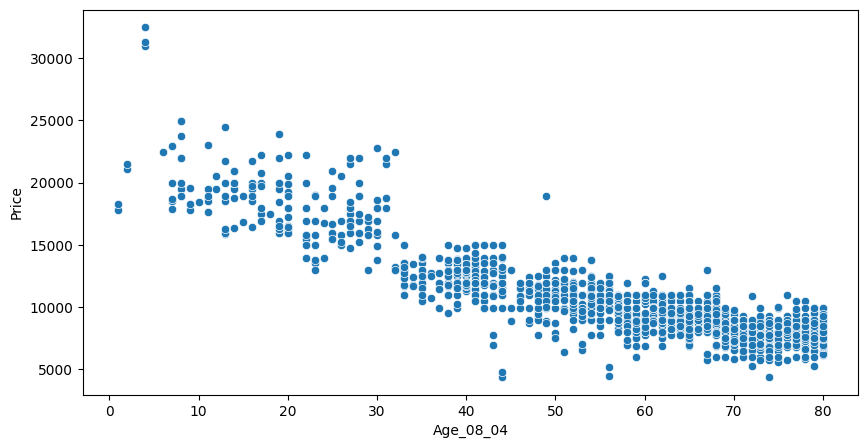

In [28]:
#relationship between price and the age of the car
plt.figure(figsize=(10,5))
sns.scatterplot(x=cars_data['Age_08_04'],y=cars_data['Price'])
plt.show()

from the above scatter plot we can conclude that if the age of car is less then the price of car is high. if age of car is more then the price of car is low


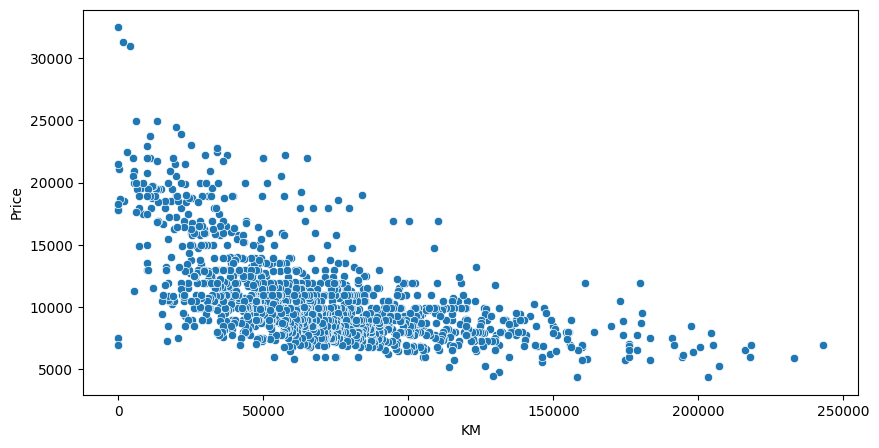

In [30]:
#lets the relationship between price and km
plt.figure(figsize=(10,5))
sns.scatterplot(x=cars_data['KM'],y=cars_data['Price'])
plt.show()

we can conclude that the less km travelled car has more price and vice versa

In [36]:
#changing the categorical data into numeric data by using encoding techniques
from sklearn.preprocessing import OneHotEncoder
encoded_data=pd.get_dummies(cars_data,columns=['Fuel_Type']).astype(int)
encoded_data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [38]:
encoded_data.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Gears,int64
Weight,int64
Fuel_Type_CNG,int64


<Axes: >

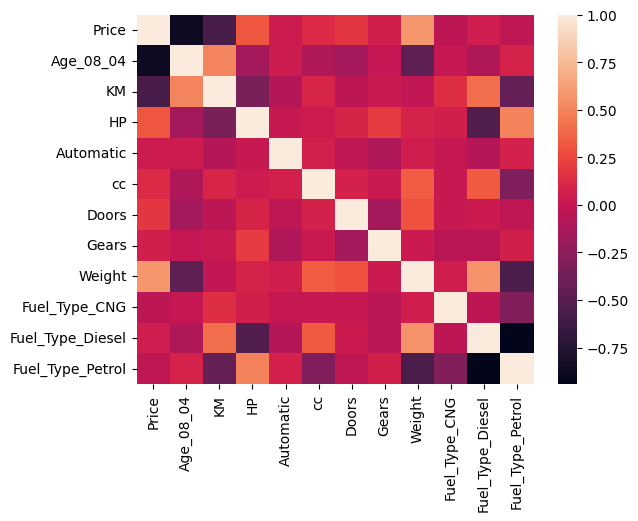

In [39]:
#heatmap
sns.heatmap(encoded_data.corr())

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [41]:
#splitting the independent and dependent variables from the data
X=encoded_data.drop('Price',axis=1)
y=encoded_data['Price']

In [42]:
#x data
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0


In [43]:
#y data
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [47]:
#rows and columns of x and y
X.shape

(1435, 11)

In [48]:
y.shape

(1435,)

In [49]:
#splitting the data training 80 and testing 20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [50]:
#Standardize the numerical data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=X.columns)
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.777268,-0.575958,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
1,-1.777268,0.116474,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
2,-1.723380,-0.716707,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
3,-1.615603,-0.548902,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.774964,-0.109493,2.884126,-2.718789
4,-1.400049,-0.802384,-0.767351,-0.242983,0.998113,-1.084443,-0.140475,1.870688,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...
1430,0.701602,-1.281492,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-0.905299,-0.109493,-0.346726,0.367811
1431,0.863267,-1.322689,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1432,0.809379,-1.375627,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1433,0.755490,-1.378295,-1.034441,-0.242983,-0.651898,-1.084443,-0.140475,-1.096747,-0.109493,-0.346726,0.367811


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.


In [51]:
#building a model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred=lr.predict(X_test)

In [53]:
lr_r2=r2_score(y_test,y_pred)
lr_r2

0.8203213869961812

In [55]:
lr_mse=np.sqrt(mean_squared_error(y_test,y_pred))
lr_mse


np.float64(1468.2058289421207)

In [56]:
lr_mae=mean_absolute_error(y_test,y_pred)
lr_mae

986.4966877482502

In [60]:
#model 2 with lasso
from sklearn.linear_model import LassoCV
lasso=LassoCV(alphas=np.logspace(-3,3,100),cv=5,random_state=42,max_iter=10000)
lasso.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5, max_iter=10000, random_state=42)

In [61]:
y_pred_lasso=lasso.predict(X_test)

In [62]:
lasso_r2=r2_score(y_test,y_pred_lasso)
lasso_r2

0.8381233679108615

In [64]:
lasso_mse=np.sqrt(mean_squared_error(y_test,y_pred_lasso))
lasso_mse

np.float64(1393.5765532266382)

In [65]:
lasso_mae=mean_absolute_error(y_test,y_pred_lasso)
lasso_mae

974.8282704566265

In [68]:
#ridgecv
from sklearn.linear_model import RidgeCV
ridge=RidgeCV(alphas=np.logspace(-3,3,100),cv=5)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5)

In [69]:
y_pred_ridge=ridge.predict(X_test)

In [71]:
ridge_r2=r2_score(y_test,y_pred_ridge)
ridge_r2

0.8373601688132324

In [72]:
ridge_mse=np.sqrt(mean_squared_error(y_test,y_pred_ridge))
ridge_mse

np.float64(1396.8578350611838)

In [73]:
ridge_mae=mean_absolute_error(y_test,y_pred_ridge)
ridge_mae

984.3544189451418

In [76]:
#comparing all the model performances
model_comparison = pd.DataFrame({
    "Model":['linear Regression','Lasso Regression','Ridge Regression'],
    "r2_score":[lr_r2,lasso_r2,ridge_r2],
    "mse":[lr_mse,lasso_mse,ridge_mse],
    "mae":[lr_mae,lasso_mae,ridge_mae]

    })


In [77]:
model_comparison

,Model,r2_score,mse,mae
0,linear Regression,0.820321,1468.205829,986.496688
1,Lasso Regression,0.838123,1393.576553,974.828270
2,Ridge Regression,0.837360,1396.857835,984.354419


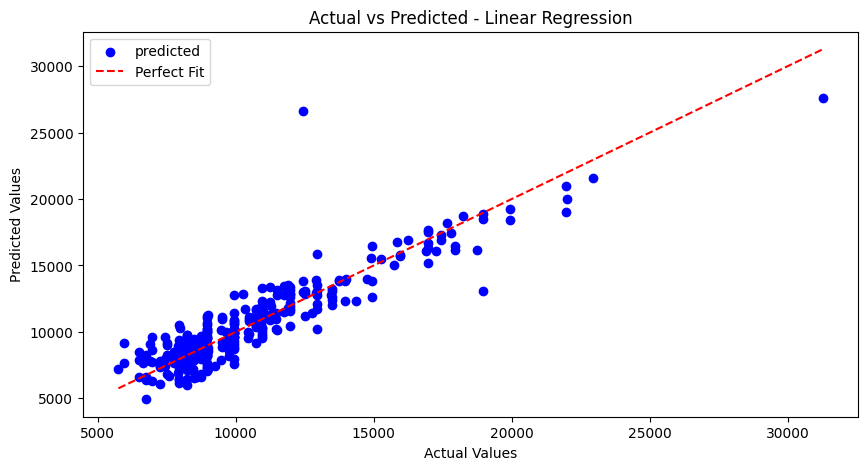

In [84]:
#visualization of actual and predicted of linear regression
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue',label='predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Linear Regression')
plt.legend()
plt.show()


In [ ]:
1.What is Normalization & Standardization and how is it helpful?

1.What is Normalization & Standardization and how is it helpful?

Normalization is also known as min max scaling
Normalization is a technique which is used to scale the given numerical data from 0 to 1.
for example we have a dataset and we have different attributes with different numerical range age from 0-20 and Bp of a person from 0-200 so by using normalization we can scale the both the attributes values from 0 to 1.

Normaliation formula :  X - Xmin / Xmax - Xmin

Normalization is used in distance based model like KNN,clustering and PCA

Standardization : It is used to transfrom the data from mean=0 and standard deviation = 1
It also known as z-score scaling
formula is
      X - mean(X)/std(X)

it is used for linear models like
K-means,linear regression , logistic regression, SVM
it distributed the data in bell shaped curve
after standarization the data is centered to zero



2.What techniques can be used to address multicollinearity in multiple linear regression?



Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with eachother.

if the column has more than 0.8 correlated then the multicollinearity will occur

effects of multicollinearity
1.High standard errors
2.regression coefficients become unstable
3.model interpretation becomes difficult

techniques to address multicollinearity
1.droping the correlated variables
if two features are highly correated like 0.9 then remove one feature from the data

2.vif
vif stands for variance influence factor
it measure the how much variance is inflated by multicollinearity

formula is 1/1-r**2
vif < 5 less collinearity
5 < vif < 10 : moderate collinearity
vif > 10 : high collinearity

3.regularization
it adds the penalty to large coefficients it reduces the effect of multicollinearity
1.lasso - it shrinks the coefficient to zero effectively removing them
2. ridge - it reduces the size of correlated coefficients

4. PCA
by using pca it converts the highly correlated coefficients to uncorrelated coefficients.

5.Increasing the size of data
some times the multicollinearity occurs due to small data
so by adding more data points we can reduce the multicollinearity.